In [1]:
import sys
import numpy as np

polymerLenght = 10
headN = 1

random_forces_sum = np.zeros((2,))
# DEFINE SYSTEM

class Bodies:
    def __init__(self, polymerLenght, headN, mass = 1):
        self.polymerLenght = polymerLenght
        self.headN = headN
        self.mass = mass
        self.polymer = np.array((range(polymerLenght), np.zeros(polymerLenght))).T
        self.position = np.array((5, 0.60))
        self.velocity = np.zeros(headN)
        self.acceleration = np.zeros(headN)
        
    #def integrate(self):
    
        
   

In [2]:
     
### old version
def polymergenerator(polymerl, headl, mass=1):
    polymer = np.array((range(polymerl), np.zeros(polymerl))).T
    # heads = np.array([range(headl), np.zeros(headl), np.zeros(headl)]).T
    heads = np.array((5, 0.60))
    head_surface = heads.copy()
    head_surface[0] += 1
    centers_of_mass = (head_surface[0] + heads) / 2
    orientation_head = heads - centers_of_mass
    orientation_surface = head_surface - centers_of_mass
    return polymer, heads #, centers_of_mass, head_surface


# DEFINE FORCES
def forcefield(a, b, epsilon=0.1, sigma=0.50, mass = 1, random = 0.1, random_forces_summ = random_forces_sum):
    dif = a - b
    dist = np.sqrt(np.sum(np.square(dif), axis=1))
    f = 24 * epsilon * (-2*(sigma**12 / dist**13) + (sigma**6 / dist**7))
    direction = dif / np.array((dist, dist)).T
    random_forces = np.random.uniform(-random, random, (2,))
    forcevector = np.sum(direction * np.array((f, f)).T, axis=0) + random_forces
    random_forces_summ += random_forces
    # a = forcevector/mass 
    return forcevector, random_forces_summ, direction



def lj_brownian(a, b, epsilon=0.1, sigma=1.0):
    dif = a - b
    dist = np.sqrt(np.sum(np.square(dif), axis=1))
    f = 24 * epsilon * (-2*(sigma**12 / dist**13) + (sigma**6 / dist**7))
    vector = dif / np.array((dist, dist, dist)).T
    forcevector = np.sum(vector * np.array((f, f, f)).T, axis=0)
    return forcevector


# DEFINE INTEGRATION ALG
def verlet(positions, velocities, accelerations, dt, random):
    positions = positions + velocities * dt + (accelerations/2) * (dt**2)
    accelerationst1, random_forces_summ, direction = forcefield(polymerX, positions, random = random)
    velocities =  velocities + (accelerationst1 + accelerations) * (dt/2)
    return positions, velocities, accelerationst1, random_forces_summ


def notverlet(positions, dt, random, mu = 1):
    force = lj_brownian(polymerX, positions)
    random_forces = np.random.uniform(-random, random, (3,))
    positions += (mu * force + random_forces) * dt 
    return positions, force


def rotate(positions, center, angle):
    offset = positions-center
    new_position = np.array(offset[0]*np.sin(angle)-offset[1]*np.cos(angle), offset[0]*np.cos(angle)+offset[1]*np.sin(angle))

def ang_integrate(center, surf_1, surf_2, polymer, ang_vel, ang_acc, dt, offsets, masses, force, orientation):
    torque = (forcefield(polymerX,surf_1, masses)*0.5 - forcefield(polymer,surf_2, masses)*0.5)*(np.cross(orientation, force)/(np.linalg.norm(orientation)*np.linalg.norm(force)))
    ang_dis = rotate(positions, center, ang_vel*dt)
    ang_vel = ang_vel + dt*torque/inertia
    # find cross product between vectors to obtain sin(a), giving you 
    # find perpendicular vector, rotate around the axis
    
    
    # LETS TRY NON RIGID INTERACTIONS



In [3]:
polymerX, headX = polymergenerator(polymerLenght, headN)
forcevectors = forcefield(polymerX, headX)
#np.set_printoptions(threshold=sys.maxsize)
print(forcevectors)

(array([ 0.08700516, -0.51798181]), array([ 0.08700562, -0.06252156]), array([[-0.99287684, -0.11914522],
       [-0.98893635, -0.14834045],
       [-0.98058068, -0.19611614],
       [-0.95782629, -0.28734789],
       [-0.85749293, -0.51449576],
       [ 0.        , -1.        ],
       [ 0.85749293, -0.51449576],
       [ 0.95782629, -0.28734789],
       [ 0.98058068, -0.19611614],
       [ 0.98893635, -0.14834045]]))


In [4]:
polymerX, headX = polymergenerator(polymerLenght, headN)
np.set_printoptions(threshold=sys.maxsize)

vX = np.array((0,0))
aX = np.array((0,0))

random_forces_sum = np.zeros((2,))

steps = 200000
print_every = 1

#track history positions, velocities and accelerations 
headhist = np.zeros((int(steps/print_every), 2))
velhist = np.zeros((int(steps/print_every), 2))
acchist = np.zeros((int(steps/print_every), 2))

# RUN
for i in range(steps):
    headX, vX, aX, random_forces_sum = verlet(headX, vX, aX, 0.01, random = 0.01)
    if i%10000 == 0: print(headX, vX[1], aX[1]) # sanity check output to console
    headhist[i] = headX
    velhist[i] = vX
    # acchist[i] = aX
    
random_forces_sum

[5.  0.6] -0.0022289961488519577 -0.44579922977039155
[6.43962524 0.29869082] -0.23582113213951103 0.4549143225017343
[8.3567475  0.44233993] 0.09311301534021012 -0.20743369332088918
[7.47874128 0.18068784] 0.11172337733753054 1.1594080926902546
[5.34164136 0.46874447] 0.19266594449246632 -0.3335388852453709
[8.48904858 0.46235443] -0.11064535307897956 -0.5178208057806472
[7.50500247 0.3474708 ] -0.2437692547281138 -0.5256869501394345
[6.41164817 0.44297535] -0.22271808729817788 -0.4821960935442809
[3.56189788 0.46951847] 0.049525945174038855 -0.49922538786561216
[3.49425598 0.13118629] -0.08198105111991963 1.2691392665872376
[2.20375161 0.50335543] -0.07703138974533771 0.515861774855061
[0.98392825 0.54120726] -0.05895909928857269 0.6467773680722669
[5.92171334 0.56956569] 0.11094327971497488 -0.2471827317913058
[7.89558366 0.57291385] 0.03986835077975386 -0.3307995311574597
[7.60863867 0.45603317] 0.19350698343077072 -0.46804371895102387
[6.69143795 0.47147553] 0.04981410214130621 -0

array([-0.35257244, -1.63209692])

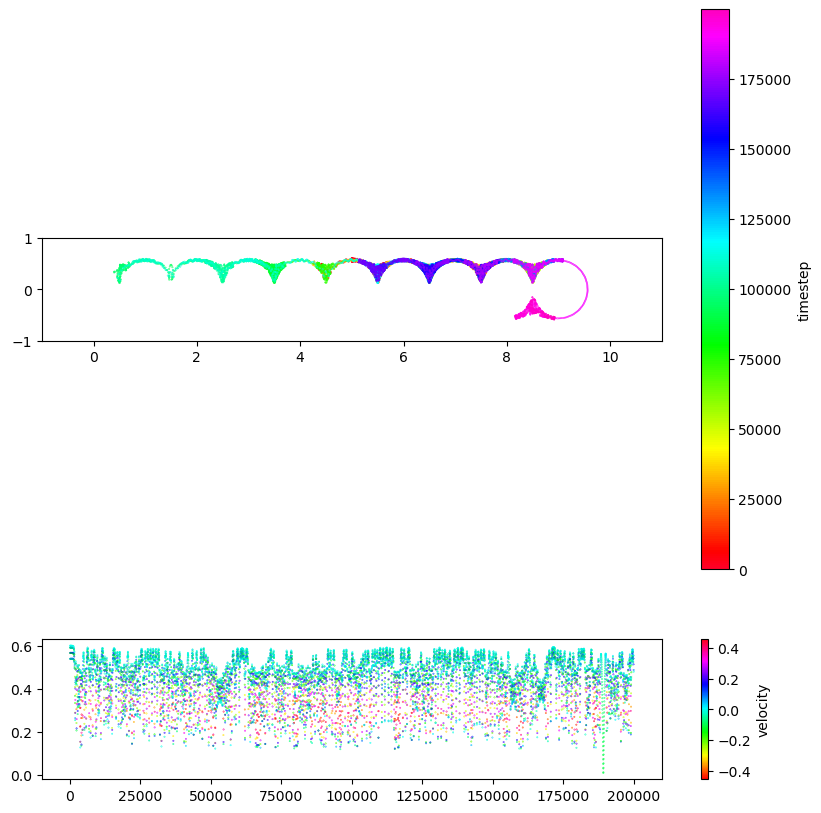

In [5]:
disthist = headhist[:,1]

import matplotlib.pyplot as plt
time = np.arange(200000)
fig, ax = plt.subplots(2,gridspec_kw={'height_ratios': [4, 1], "width_ratios": [1]}, figsize=(10,10))
pos = ax[0].scatter(headhist[::20,0], headhist[::20,1], cmap="gist_rainbow", c=time[::20], s=0.1)
ax[0].set_xlim(-1, 11)
ax[0].set_ylim(-1, 1)
ax[0].set_aspect("equal", adjustable="box")
dist = ax[1].scatter(time[::20], abs(disthist[::20]), cmap="hsv", c=velhist[::20,1], s=0.1)
fig.colorbar(pos, label='timestep')
fig.colorbar(dist, label='velocity')

In [9]:
with open("trajectory.pdb", "w") as f:
    for t, positions in enumerate(headhist[::100]):  # Save every 100th frame
        f.write(f"MODEL     {t + 1}\n")
        f.write(f"ATOM  {1:5d}  C   UNK     1    {positions[0]:8.3f}{positions[1]:8.3f}  1.00  0.00           C\n")
        f.write("ENDMDL\n")

In [10]:
with open("polymerr.pdb", "w") as f:
    for i in range(polymerLenght):
        f.write(f"ATOM  {i+2:5d}  C   UNK     1    {i:8.3f}{0:8.3f}{0:8.3f}  1.00  0.00           C\n")

In [2]:
import nglview as nv

In [12]:
#nv.show_file("polymerr.pdb")

NGLWidget()

In [46]:
disthist.size

200000

In [47]:
velhist.size

400000